# Web Scraping with Python

#### Notebook by Tanguy HODONOU

#### Objective: Scraping the data available [here](https://www.senscritique.com/liste/Bon_Films/66436) on senscritique website for movies between Page 1 and Page10 and perform the EDA.

## Table of contents

1. [Required libraries](#Required-libraries)

2. [Preparing the dataset](#Preparing-the-dataset)

3. [Piecing everything together](#Piecing-everything-together)

4. [Cleaning the scraped data](#Cleaning-the-scraped-data)

5. [Exploratory Data Analysis](#Exploratory-Data-Analysis)


### Required libraries

In [151]:
from selenium import webdriver
import time
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

# from selenium.webdriver.support.ui import Select
# from bs4 import BeautifulSoup
# from requests import get
# from time import sleep
# from random import randint
# from IPython.core.display import clear_output
# from bs4 import BeautifulSoup


### Preparing the dataset

On the senscritique website, it is possible to filter the searches, and thus to display all the movies for one variable, such as the year or rating, etc.

There are many data available on this page. The data I want to keep for my Data Science study are:

 - The name of the movie
 - the director
 - the main actors
 - type of movie
 - duration
 - release date
 - rating

So I developed a **Python script** using the BeautifulSoup library, which allows to parse HTML code, I limited the parsing to 10 pages, on each page there are 30 movies with all the data I want.

In [114]:
# déclaration des listes dans lesquelles stocker les données
Nom_du_film1 = []
Realisateur1 = []
Acteurs_principaux1 = []
Type_de_film1 = []
Duree1 = []
Date_de_sortie1 = []
rating1 = []

pages=[]
for i in range(1, 11):
    url = 'https://www.senscritique.com/liste/Bon_Films/66436#page-'+str(i)
    pages.append(url)
for page in pages:
    browser = webdriver.Chrome(executable_path="C:/chromedriver.exe")
    response=browser.get(page)
    #import time
    time.sleep(10)
    html=browser.page_source
    
    #Name_of_movie
    nom= browser.find_elements_by_class_name('elco-anchor')
    nom_titles = [x.text for x in nom]
    Nom_du_film1.append(nom_titles)

    #director  
    Realisateur = browser.find_elements_by_class_name("elco-baseline")
    Realisateur_nom = [x.text for x in Realisateur][1::2]
    Realisateur_nom1= [i.split("avec")[0:1] for i in Realisateur_nom]
    Realisateur1.append(Realisateur_nom1)


    # main_actors   
    Acteurs_principaux = browser.find_elements_by_class_name("elco-baseline")
    nom_acteurs= [x.text for x in Acteurs_principaux][1::2]
    nom_acteurs1= [i.split("avec")[1:] for i in nom_acteurs]
    Acteurs_principaux1.append(nom_acteurs1)

    #type_of_movie   
    Type_de_film = browser.find_elements_by_class_name("elco-baseline")
    Type_de_fil = [x.text for x in Type_de_film][0:60:2]
    Type_de_films= [i.split('.')[2] for i in Type_de_fil]
    Type_de_film1.append(Type_de_films)


    #duration
    Duree = browser.find_elements_by_class_name("elco-baseline")
    Dureet=[x.text for x in Duree][0:60:2]
    duree1= [i.split('.')[0] for i in Dureet]
    Duree1.append(duree1)
    

    #release_date
    Date_de_sortie = browser.find_elements_by_class_name("elco-baseline")
    ddate_de_sortie=[x.text for x in Date_de_sortie][0:60:2]
    ddate_de_sortie1= [i.split('.')[1] for i in ddate_de_sortie]
    Date_de_sortie1.append(ddate_de_sortie1)
    
    #rating
    note = browser.find_elements_by_class_name("erra-global")
    rating = [x.text for x in note]
    rating1.append(rating)

In [115]:
from functools import reduce
Nom_du_film2= reduce(lambda x,y: x+y,Nom_du_film1)
Realisateurs= reduce(lambda x,y: x+y,Realisateur1)
Realisateurs2= reduce(lambda x,y: x+y,Realisateur1)
Acteurs_principauxx= reduce(lambda x,y: x+y,Acteurs_principaux1)
Acteurs_principauxo=reduce(lambda x,y: x+y,Acteurs_principauxx)
Type_de_film2= reduce(lambda x,y: x+y,Type_de_film1)
Duree2= reduce(lambda x,y: x+y,Duree1)
Date_de_sortie2= reduce(lambda x,y: x+y,Date_de_sortie1)
Acteurs_principauxo.insert(40, 'NA')
Rating2= reduce(lambda x,y: x+y,rating1)

### Piecing everything together

We create then the following dataframe **film_df** we can now save our dataframe in csv sheet.
for later usage.

In [116]:
film_df = pd.DataFrame({'Name_of_movie': Nom_du_film2,
'director': Realisateurs2,
'main_actors': Acteurs_principauxo,
'type_of_movie': Type_de_film2,
'duration': Duree2,
'release_date': Date_de_sortie2,
'rating': Rating2                       
})

In [117]:
film_df.to_csv('E:/A_Projects/scraped.csv', encoding='utf-8-sig', index=False, sep=';')

We can now save our dataframe in csv sheet.

### Cleaning the scraped data

We’ll clean the scraped data with those goals in mind: plotting the distribution of rating. Identifiying the rating by type of movie, Identifiying the type of movie by year, Identiying the rating mean by type of movie
Consequently, our data cleaning will consist of:

    Creating the release_year column from release_date column.
    Creating type movie column from type_of_movie column (to keep only the type of movie went there are two or more.
    Reordering the columns.

In [118]:
df = pd.read_csv('E:/A_Projects/scraped.csv', sep=';')

We can check the info of the df to see there are any missing values that we can fill.

In [119]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 7 columns):
Name_of_movie    299 non-null object
director         299 non-null object
main_actors      298 non-null object
type_of_movie    294 non-null object
duration         299 non-null object
release_date     299 non-null object
rating           299 non-null object
dtypes: object(7)
memory usage: 16.5+ KB
None


With the code below we identifie precisely where the missing values are to deal with them.

In [120]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

main_actors      1
type_of_movie    5
dtype: int64

In [121]:
print(df[df.isnull().any(axis=1)].head())

          Name_of_movie                              director  \
40             Fireball       ['Film de Thanakorn Pongsuwan']   
56   Ma fille, mon ange     ['Film de Alexis Durand-Brault ']   
103  La Beauté du geste        ['Film de Nicole Holofcener ']   
108         Soul Surfer            ['Film de Sean McNamara ']   
147              Switch  ['Film de Frédéric Schoendoerffer ']   

                                           main_actors type_of_movie  \
40                                                 NaN           NaN   
56        Michel Côté, Karine Vanasse, Dominique Leduc           NaN   
103   Oliver Platt, Catherine Keener, Elizabeth Keener           NaN   
108          AnnaSophia Robb, Helen Hunt, Dennis Quaid           NaN   
147       Eric Cantona, Aurélien Recoing, Karina Testa           NaN   

                    duration               release_date rating  
40                1 h 28 min                     Action    4.7  
56                1 h 25 min   Sortie : 16 fév

Now we what are the missing values (the value that are not on the web page we scrapped) we decide to fill them with informations find on the internet.

In [122]:
df.loc[df.Name_of_movie == "Fireball", 'release_date'] = "2009"
df.loc[df.Name_of_movie == "Fireball", 'type_of_movie'] = "Action"
df.loc[df.Name_of_movie == "Fireball", 'main_actors'] = "Preeti Barameeanat, Khanutra Chuchuaysuwan"
df.loc[df.Name_of_movie == "Manuale d'amore 2 (Capitoli successivi)", 'rating'] = "8"


df.loc[df.Name_of_movie == "La Beauté du geste", 'type_of_movie'] = "Comédie dramatique"
df.loc[df.Name_of_movie == "Soul Surfer", 'type_of_movie'] = "Drame, action et biopic"
df.loc[df.Name_of_movie == "Switch", 'type_of_movie'] = "Thriller"
df.loc[df.Name_of_movie == "Ma fille, mon ange", 'type_of_movie'] = "Thriller"

df.loc[df.Name_of_movie == "La Beauté du geste", 'release_date'] = "Sortie : 8 juillet 2010"
df.loc[df.Name_of_movie == "Soul Surfer", 'release_date'] = "Sortie : 15 avril 2011"
df.loc[df.Name_of_movie == "Switch", 'release_date'] = "Sortie : 6 juillet 2011"

df.loc[df.Name_of_movie == "La Beauté du geste", 'duration'] = "1 h 30 min"
df.loc[df.Name_of_movie == "Soul Surfer", 'duration'] = "1 h 46 min"
df.loc[df.Name_of_movie == "Switch", 'duration'] = "1 h 28 min"

In [123]:
df.loc[df.Name_of_movie == "Manuale d'amore 2 (Capitoli successivi)", 'rating'] = "8"
df['release_year'] = df['release_date'].str[-4:] #creating the release_year columns
df['type_movie'] = df['type_of_movie'].str.split().str[0] #creating the type_movie (only one type)
df.rating = df["rating"].astype(float) #we convert string rating into float
df.type_movie = df_cleaned["type_movie"].str.replace(',', '')

After all that process of cleaning the scraped data, we now have a well build data frame name **df_cleaned** ready to be explore.

In [133]:
df_cleaned = df[['Name_of_movie', 'type_movie', 'release_year', 'rating', 'duration']]

In [134]:
df_cleaned.head(5)

,Name_of_movie,type_movie,release_year,rating,duration
0,Les Émotifs anonymes,Comédie,2010,6.1,1 h 20 min
1,Killing Bono,Comédie,2011,6.4,1 h 54 min
2,"Robin des bois, prince des voleurs",Aventure,1991,6.6,2 h 23 min
3,Un duplex pour 3,Comédie,2004,5.4,1 h 37 min
4,8 Mile,Drame,2002,6.8,1 h 50 min


In [145]:
df_cleaned.describe().loc[['min', 'max'], ['rating']]

,rating
min,2.7
max,8.5


In [143]:
df_cleaned.loc[df_cleaned['rating'] == 8.5, 'Name_of_movie']

131    Le Bon, la Brute et le Truand
Name: Name_of_movie, dtype: object

In [142]:
df_cleaned.loc[df_cleaned['rating'] == 2.7, 'Name_of_movie']

188    Humains
Name: Name_of_movie, dtype: object

The movie **Humains** is the one with the lowest rate and the movie **Le Bon, la Bryte et le Truand** have the highest rate. 

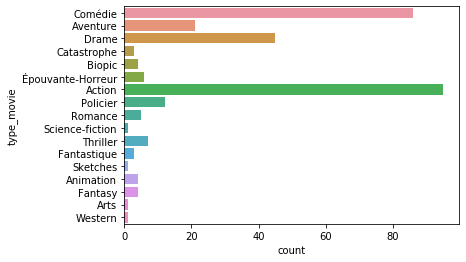

In [170]:
sns.countplot(y="type_movie", data=df_cleaned)
plt.show()

In [169]:
my_tab=pd.crosstab(df_cleaned["type_movie"], "freq", normalize=True)
my_tab

col_0,freq
type_movie,
Action,0.317726
Animation,0.013378
Arts,0.003344
Aventure,0.070234
Biopic,0.013378
Catastrophe,0.010033
Comédie,0.287625
Drame,0.150502
Fantastique,0.010033


The plot above show the share of the different movie type in the dataset. The type Comédie,Drame and Action are the most frequent. There are 31.77% of action movie, 28.76% of Comedie Movie and 15.05% of Drame movie.

Below we can se the average rating by movie type

In [135]:
df_cleaned.groupby('type_movie')[['rating']].mean()

,rating
type_movie,
Action,5.653684
Animation,6.550000
Arts,6.200000
Aventure,5.833333
Biopic,6.150000
Catastrophe,4.800000
Comédie,5.701163
Drame,6.328889
Fantastique,4.433333


Text(0.5, 1.0, 'The distribution of rating')

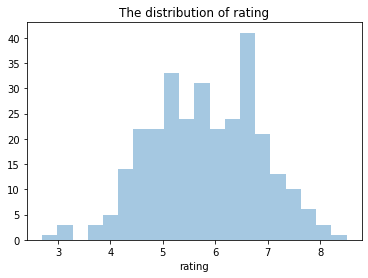

In [173]:
g = sns.distplot(df_cleaned.rating, bins=20, kde=False)
g.set_title('The distribution of rating')

With the distribution of rating, we can see that most ratings are between 4 and 7. There are few movies with a rating greater than 7, and even fewer with a rating smaller than 4. This indicates that both very good movies and very bad movies are rarer.